In [2]:
pip install matplotlib

  Using cached matplotlib-3.5.1-cp310-cp310-win_amd64.whl (7.2 MB)
  Using cached cycler-0.11.0-py3-none-any.whl (6.4 kB)
  Using cached kiwisolver-1.3.2-cp310-cp310-win_amd64.whl (52 kB)
  Using cached Pillow-9.0.0-cp310-cp310-win_amd64.whl (3.2 MB)
  Using cached fonttools-4.29.0-py3-none-any.whl (895 kB)



You should consider upgrading via the 'C:\Users\molly\Desktop\devMountain\specializations\week-13\correlation-trials\env\Scripts\python.exe -m pip install --upgrade pip' command.


In [11]:
import numpy as np
import matplotlib 
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import pearsonr, spearmanr

In [6]:
absent_data = pd.read_csv("Absenteeism_at_work.tsv", sep='\t')
absent_data

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
735,11,14,7,3,1,289,36,13,33,264.604,...,0,1,2,1,0,1,90,172,30,8
736,1,11,7,3,1,235,11,14,37,264.604,...,0,3,1,0,0,1,88,172,29,4
737,4,0,0,3,1,118,14,13,40,271.219,...,0,1,1,1,0,8,98,170,34,0
738,8,0,0,4,2,231,35,14,39,271.219,...,0,1,2,1,0,2,100,170,35,0


In [7]:
absent_data.isnull().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

## Problems

#### 1. Day of the week and reason for absence

- Day of the week (Monday (2), Tuesday (3), Wednesday (4), Thursday (5), Friday (6))
- Absences attested by the International Code of Diseases (ICD) stratified into 21 categories (I to XXI) as follows:

- I Certain infectious and parasitic diseases
- II Neoplasms
- III Diseases of the blood and blood-forming organs and certain disorders involving the immune mechanism
- IV Endocrine, nutritional and metabolic diseases
- V Mental and behavioural disorders
- VI Diseases of the nervous system
- VII Diseases of the eye and adnexa
- VIII Diseases of the ear and mastoid process
- IX Diseases of the circulatory system
- X Diseases of the respiratory system
- XI Diseases of the digestive system
- XII Diseases of the skin and subcutaneous tissue
- XIII Diseases of the musculoskeletal system and connective tissue
- XIV Diseases of the genitourinary system
- XV Pregnancy, childbirth and the puerperium
- XVI Certain conditions originating in the perinatal period
- XVII Congenital malformations, deformations and chromosomal abnormalities
- XVIII Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified
- XIX Injury, poisoning and certain other consequences of external causes
- XX External causes of morbidity and mortality
- XXI Factors influencing health status and contact with health services.

#### Using Numpy corrcoef

In [12]:
np.corrcoef(absent_data['Day of the week'],
            absent_data['Reason for absence'])

array([[1.        , 0.11631924],
       [0.11631924, 1.        ]])

#### Using pandas

In [9]:
absent_data['Day of the week'].corr(absent_data['Reason for absence'])

0.11631924393042797

#### Using Pearson's correlation

In [13]:
pearsonr(absent_data['Day of the week'], 
         absent_data['Reason for absence'])

(0.11631924393042802, 0.001526270295711275)

#### Using Spearman's Correlation

In [14]:
spearmanr(absent_data['Day of the week'], 
          absent_data['Reason for absence'])

SpearmanrResult(correlation=0.12246263308006688, pvalue=0.0008429727110657136)

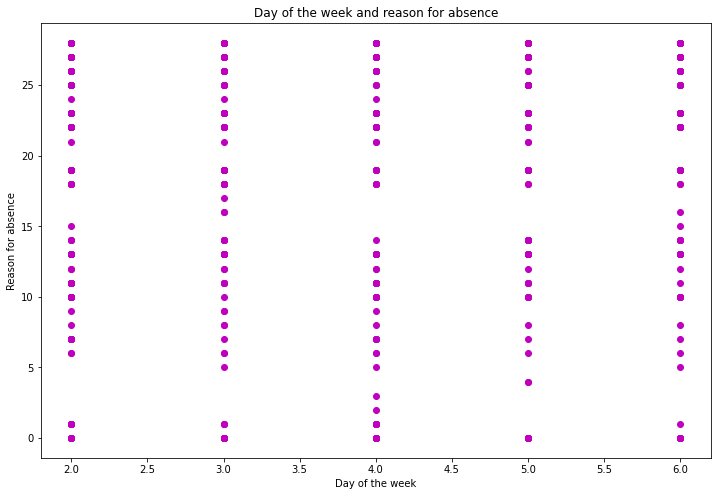

In [15]:
plt.figure(figsize=(12,8))

plt.scatter(absent_data['Day of the week'], 
            absent_data['Reason for absence'], color='m')

plt.title('Day of the week and reason for absence')

plt.xlabel('Day of the week')
plt.ylabel('Reason for absence')

plt.show()

Based on the different correlation methods tested, there does not seem to be a correlation between the day of the week and the reason for absence. The day of the week and reason for absence do not have a correlation that is statistically significant as the correlation is (rounded) 0.11. Each day of the week had similar absences and multiple reasons for absence. 

#### 2. Month of absence and age

In [16]:
absent_data['Month of absence'].corr(absent_data['Age'])

-0.0015195444984268647

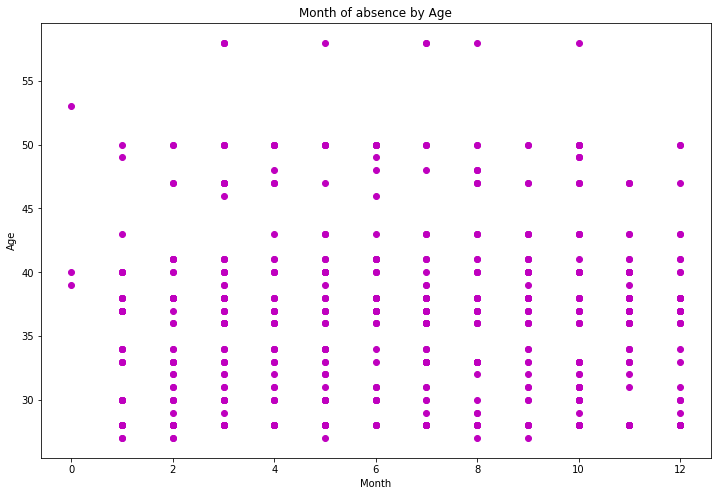

In [17]:
plt.figure(figsize=(12, 8))

plt.scatter(absent_data['Month of absence'], 
            absent_data['Age'], color='m')

plt.title('Month of absence by Age')

plt.xlabel('Month')
plt.ylabel('Age')

plt.show()

There is not a strong correlation between the month of absence and the worker's age. The correlation rounds to -0.0015. The correlation is not statistically significant because there were employees from all ages absent every month. 

#### 3. Hit target and disciplinary failure

- Hit target
- Disciplinary failure (yes=1, no=0)

In [19]:
absent_data[['Hit target', 'Disciplinary failure']]

,Hit target,Disciplinary failure
0,97,0
1,97,1
2,97,0
3,97,0
4,97,0
...,...,...
735,93,0
736,93,0
737,95,0
738,95,0


In [20]:
absent_data['Hit target'].corr(absent_data['Disciplinary failure'])

-0.14797083444555695

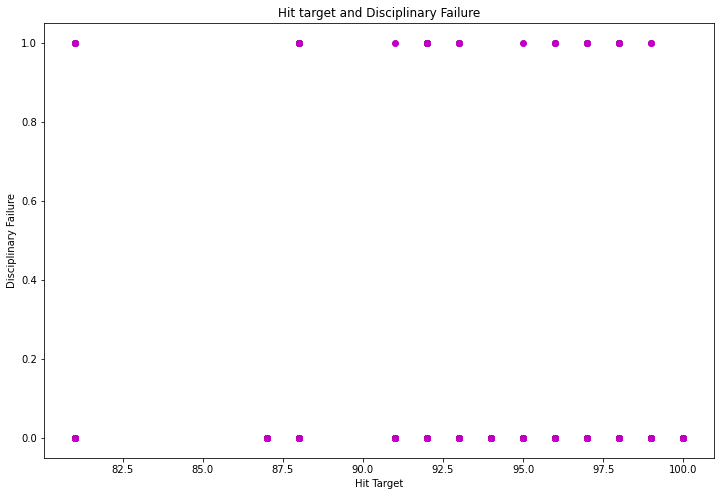

In [21]:
plt.figure(figsize=(12, 8))

plt.scatter(absent_data['Hit target'], 
            absent_data['Disciplinary failure'], color='m')

plt.title('Hit target and Disciplinary Failure')

plt.xlabel('Hit Target')
plt.ylabel('Disciplinary Failure')

plt.show()

There is not a strong correlation between a whether a disciplinary failure affects hit target performance. The correlation between the two categories is -0.14797083444555695. The correlation is not statistically significant as the hit target was high for disciplinary failure being yes and no, as well as for low hit targets.

#### Service time and reason for absence

In [22]:
absent_data['Service time'].corr(absent_data['Reason for absence'])

0.04842511542434093

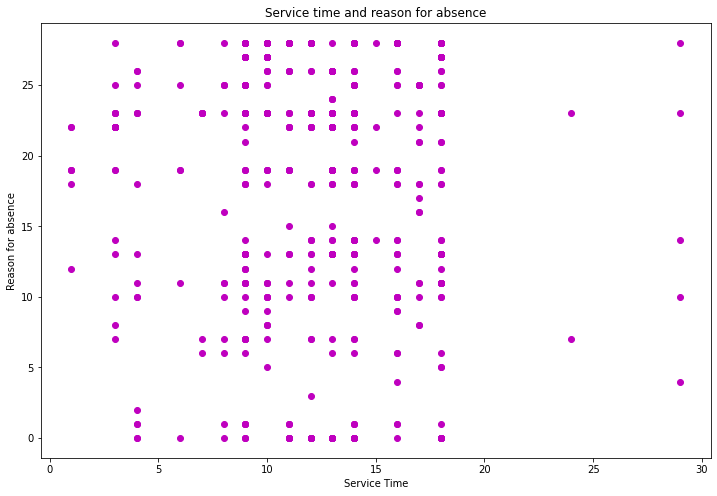

In [23]:
plt.figure(figsize=(12, 8))

plt.scatter(absent_data['Service time'], 
            absent_data['Reason for absence'], color='m')

plt.title('Service time and reason for absence')

plt.xlabel('Service Time')
plt.ylabel('Reason for absence')

plt.show()

There does not seem to be a strong correlation between the service time and reason for absence. The correlation was 0.04842511542434093. Based on the scatter plot and correlation, various service times had multiple reasons for absence. 

#### 5. Transportation expense and distance from residence to work (kilometers)

In [24]:
absent_data['Transportation expense'].corr(absent_data['Distance from Residence to Work'])

0.262183110631908

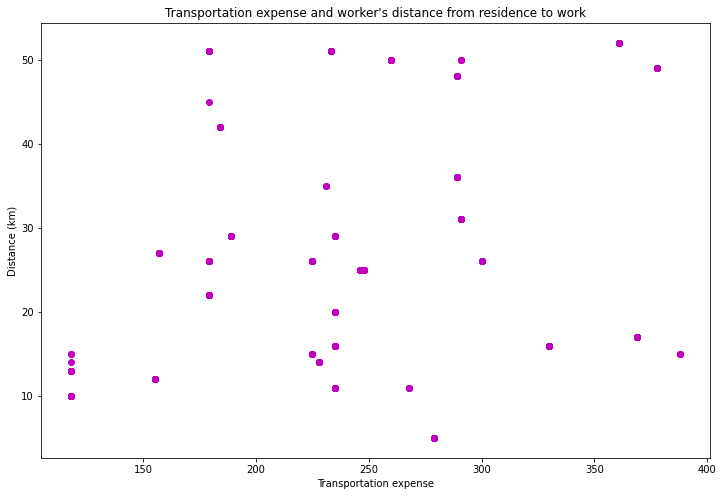

In [25]:
plt.figure(figsize=(12, 8))

plt.scatter(absent_data['Transportation expense'], 
            absent_data['Distance from Residence to Work'], color='m')

plt.title("Transportation expense and worker's distance from residence to work")

plt.xlabel('Transportation expense')
plt.ylabel('Distance (km)')

plt.show()

There is not a strong correlation between the transporation expense and the distance from residence to work. The correlation is 0.262183110631908. The scatter plot shows that some workers may travel a shorter distance but have a high transportation expense. Workers who traveled farther distances were around the same transportation expense ranger as the worker who traveled half the distance.

#### 6. Age and pet (number of pet)

In [26]:
absent_data['Age'].corr(absent_data['Pet'])

-0.2312259991265847

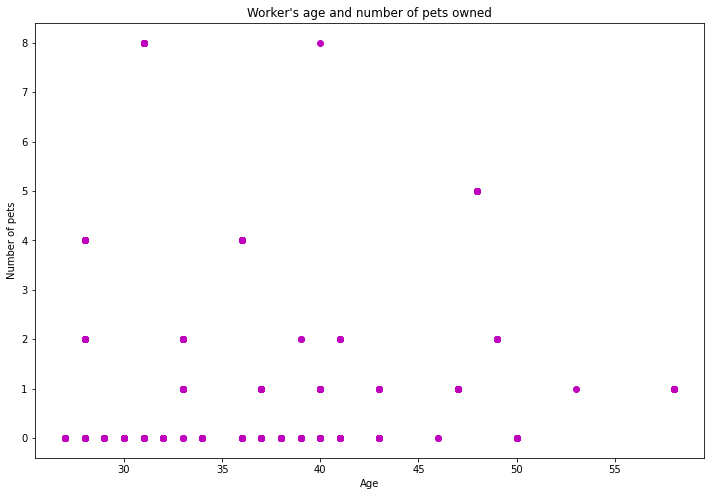

In [29]:
plt.figure(figsize=(12, 8))

plt.scatter(absent_data['Age'], 
            absent_data['Pet'], color='m')

plt.title("Worker's age and number of pets owned")

plt.xlabel('Age')
plt.ylabel('Number of pets')

plt.show()

There is not a strong correlation between the worker's age and the number of pets they own. The correlation was -0.2312259991265847. Based on the scatter plot the worker's age did not determine whether a person has a pet, many pets, or no pets.

#### 7. Absenteeism time in hours and day of the week

- Absenteeism time in hours (target)
- Day of the week (Monday (2), Tuesday (3), Wednesday (4), Thursday (5), Friday (6))

In [32]:
absent_data['Absenteeism time in hours'].corr(absent_data['Day of the week'])

-0.12436061376972109

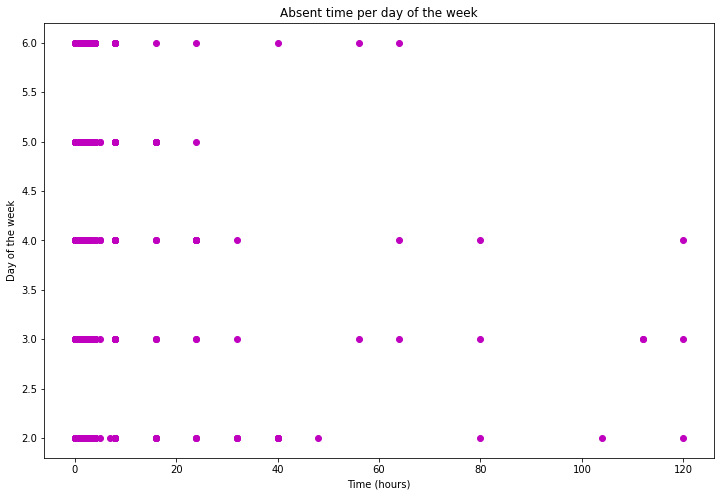

In [33]:
plt.figure(figsize=(12, 8))

plt.scatter(absent_data['Absenteeism time in hours'], 
            absent_data['Day of the week'], color='m')

plt.title("Absent time per day of the week")

plt.xlabel('Time (hours)')
plt.ylabel('Day of the week')

plt.show()

There is not a strong correlation between the number of hours absent and the day of the week. The correlation is -0.12436061376972109. Every day of the week had varying hours of absences.

#### 8. Month of absence and absenteeism time in hours (target)

In [34]:
absent_data['Month of absence'].corr(absent_data['Absenteeism time in hours'])

0.02434535694486776

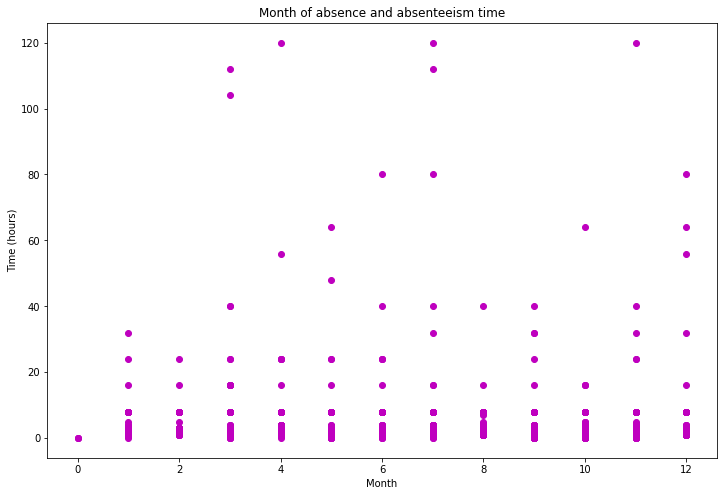

In [35]:
plt.figure(figsize=(12, 8))

plt.scatter(absent_data['Month of absence'], 
            absent_data['Absenteeism time in hours'], color='m')

plt.title("Month of absence and absenteeism time")

plt.xlabel('Month')
plt.ylabel('Time (hours)')

plt.show()

There is not a strong correlation between the month of absence and absenteeism time. The correlation is 0.02434535694486776. Most of the absenteeism time is spread throughout the months of the year. Certain months do have some employees who had higher absent times but as a whole the workers did not have increased absent times for one month specifically.

#### 9. Body mass index and height

In [36]:
absent_data['Body mass index'].corr(absent_data['Height'])

-0.12104877689386079

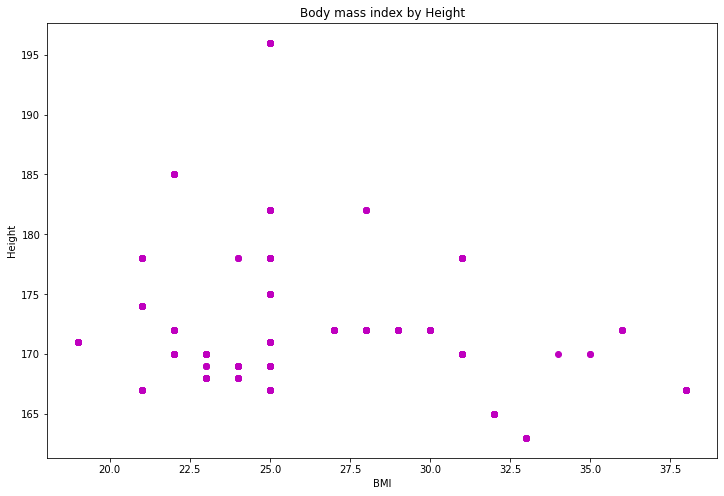

In [37]:
plt.figure(figsize=(12, 8))

plt.scatter(absent_data['Body mass index'], 
            absent_data['Height'], color='m')

plt.title("Body mass index by Height")

plt.xlabel('BMI')
plt.ylabel('Height')

plt.show()

There is not a strong correlation between a person's BMI and height based on the correlation and scatter plot. The correlation is -0.12104877689386079. A person can have a high BMI and be short and a person can be very tall and have a smaller BMI. The BMI and height do not have a direct correlation because every person is very different.

#### 10. Pet and disciplinary failure

- Pet (number of pet)
- Disciplinary failure (yes=1,no=0)

In [38]:
absent_data['Pet'].corr(absent_data['Disciplinary failure'])

0.018881352933121362

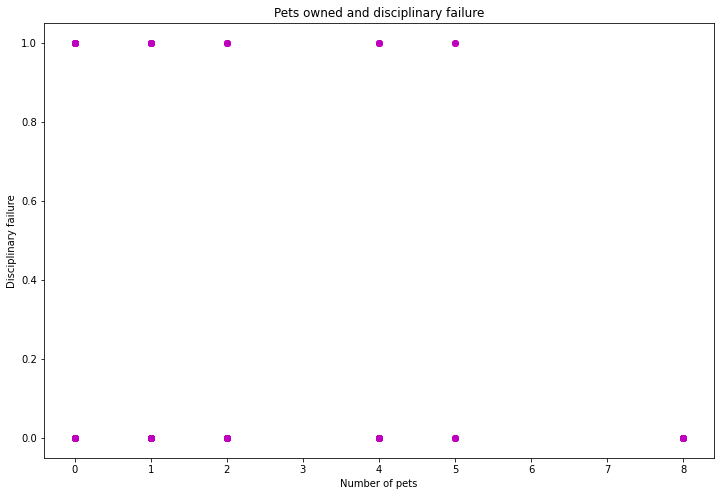

In [39]:
plt.figure(figsize=(12, 8))

plt.scatter(absent_data['Pet'], 
            absent_data['Disciplinary failure'], color='m')

plt.title("Pets owned and disciplinary failure")

plt.xlabel('Number of pets')
plt.ylabel('Disciplinary failure')

plt.show()

There is not a strong correlation between the number of pets owned and whether a worker received a disciplinary failure. The correlation is 0.018881352933121362. Based on the scatter plot workers who had one, few, and many pets recieved disciplinary failures.